## Task1


In [255]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [256]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Query ”vacation” at Google’s trends website for Poland, United, States, and United Kingdom. Download search
results from 2004 to the present day. Import csv files

In [257]:
df_pol = pd.read_csv('/content/drive/MyDrive/TSA_BDA_2024/Lab2/Poland.csv',  skiprows=2)
df_usa = pd.read_csv('/content/drive/MyDrive/TSA_BDA_2024/Lab2/USA.csv', skiprows=2)
df_uk = pd.read_csv('/content/drive/MyDrive/TSA_BDA_2024/Lab2/UK.csv',  skiprows=2)

In [258]:
df_pol

,Month,vacation: (Poland)
0,2004-01,0
1,2004-02,100
2,2004-03,0
3,2004-04,0
4,2004-05,0
...,...,...
238,2023-11,30
239,2023-12,41
240,2024-01,37
241,2024-02,44


Rename columns using country codes (eg. PL) as headers

In [259]:
df_pol.rename(columns= {"Month" : "Date", "vacation: (Poland)" : "PL" }, inplace=True)
df_pol

,Date,PL
0,2004-01,0
1,2004-02,100
2,2004-03,0
3,2004-04,0
4,2004-05,0
...,...,...
238,2023-11,30
239,2023-12,41
240,2024-01,37
241,2024-02,44


In [260]:
df_usa.rename(columns= {"Month" : "Date", "vacation: (United States)" : "US" }, inplace=True)
df_usa

,Date,US
0,2004-01,98
1,2004-02,89
2,2004-03,80
3,2004-04,78
4,2004-05,85
...,...,...
238,2023-11,39
239,2023-12,53
240,2024-01,45
241,2024-02,42


In [261]:
df_uk.rename(columns= {"Month" : "Date", "vacation: (United Kingdom)" : "UK" }, inplace=True)
df_uk


,Date,UK
0,2004-01,41
1,2004-02,38
2,2004-03,43
3,2004-04,36
4,2004-05,38
...,...,...
238,2023-11,26
239,2023-12,49
240,2024-01,28
241,2024-02,27


Set datetime index for each dataframe.

In [262]:
df_pol.set_index("Date", inplace=True)
df_usa.set_index("Date", inplace=True)
df_uk.set_index("Date", inplace=True)

In [263]:
df_pol

,PL
Date,
2004-01,0
2004-02,100
2004-03,0
2004-04,0
2004-05,0
...,...
2023-11,30
2023-12,41
2024-01,37


Combine the search counts in one dataframe

In [264]:
df_all = pd.concat([df_pol, df_usa, df_uk], axis=1)

In [265]:
df_all

,PL,US,UK
Date,,,
2004-01,0,98,41
2004-02,100,89,38
2004-03,0,80,43
2004-04,0,78,36
2004-05,0,85,38
...,...,...,...
2023-11,30,39,26
2023-12,41,53,49
2024-01,37,45,28


Present the time series for all countries in one plot

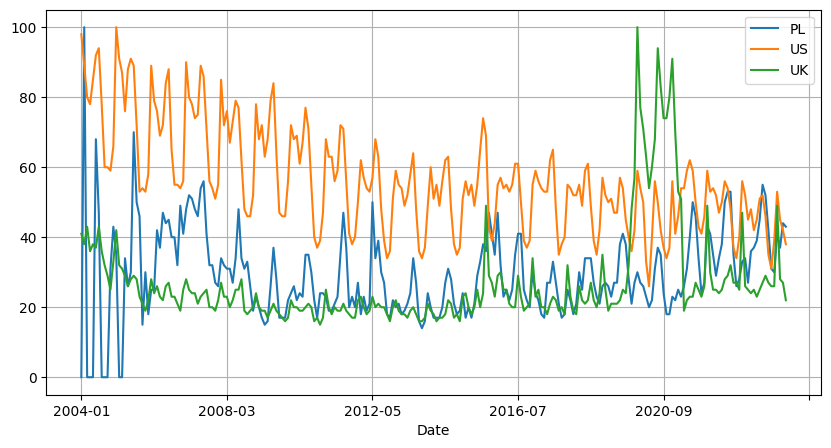

In [266]:
df_all.plot(figsize=(10,5), grid=True)
plt.show()

Generate descriptive statistics

In [267]:
df_all.describe()

,PL,US,UK
count,243.000000,243.000000,243.000000
mean,29.292181,56.609053,27.008230
std,12.705868,14.915168,14.275041
min,0.000000,26.000000,15.000000
25%,21.000000,47.000000,20.000000
50%,27.000000,54.000000,23.000000
75%,35.500000,64.000000,27.000000
max,100.000000,100.000000,100.000000


Show three histograms in one plot.

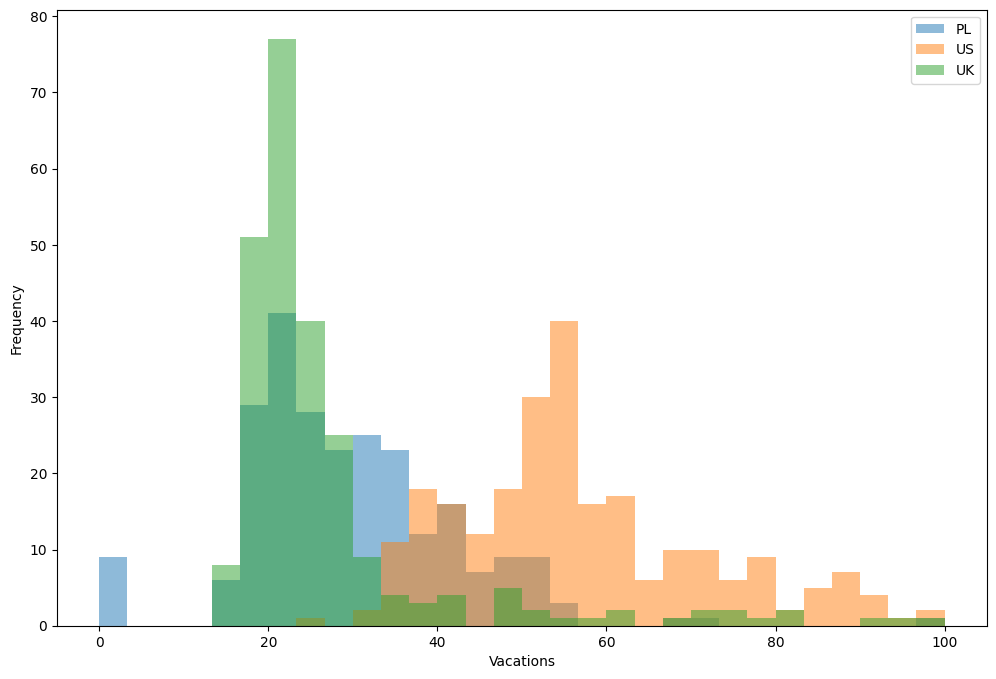

In [268]:
df_all.plot.hist(bins=30, alpha=0.5, figsize=(12, 8))
plt.xlabel("Vacations")
plt.ylabel("Frequency")
plt.show()

Show three kernel densities in one plot

> Indented block



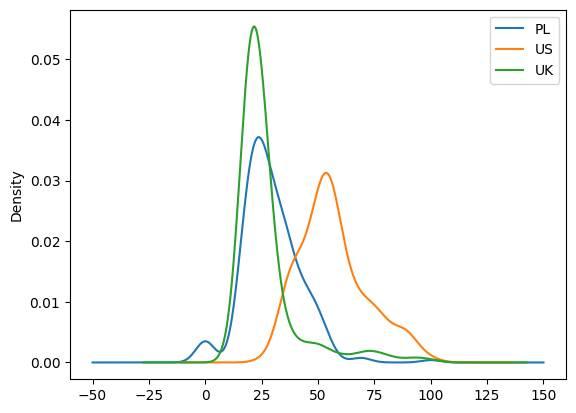

In [269]:
df_all.plot.kde()
plt.show()

# TASK2

Get the average temperature data for St. Louis, Missouri from NOOA website.

In [270]:
df_temp = pd.read_csv('/content/drive/MyDrive/TSA_BDA_2024/Lab2/AvgTemp.csv',  skiprows=4)
df_temp

,Date,Value,Anomaly
0,193804,57.3,0.3
1,193805,65.6,-1.2
2,193806,74.3,-1.9
3,193807,81.3,1.2
4,193808,82.0,3.6
...,...,...,...
1012,202208,79.7,1.3
1013,202209,71.4,0.7
1014,202210,58.7,-0.5
1015,202211,47.3,1.4


In [271]:
# introducing five 5 missing values randomly
random_indices = np.random.choice(df_temp.index, size=5, replace=False)
df_temp.loc[random_indices, 'Value'] = -99

In [272]:
df_temp

,Date,Value,Anomaly
0,193804,57.3,0.3
1,193805,65.6,-1.2
2,193806,74.3,-1.9
3,193807,81.3,1.2
4,193808,82.0,3.6
...,...,...,...
1012,202208,79.7,1.3
1013,202209,71.4,0.7
1014,202210,58.7,-0.5
1015,202211,47.3,1.4


In [273]:
df_temp.replace(-99, np.nan, inplace=True)

In [274]:
df_temp

,Date,Value,Anomaly
0,193804,57.3,0.3
1,193805,65.6,-1.2
2,193806,74.3,-1.9
3,193807,81.3,1.2
4,193808,82.0,3.6
...,...,...,...
1012,202208,79.7,1.3
1013,202209,71.4,0.7
1014,202210,58.7,-0.5
1015,202211,47.3,1.4


In [275]:
df_temp.interpolate(inplace=True)

In [276]:
df_temp

,Date,Value,Anomaly
0,193804,57.3,0.3
1,193805,65.6,-1.2
2,193806,74.3,-1.9
3,193807,81.3,1.2
4,193808,82.0,3.6
...,...,...,...
1012,202208,79.7,1.3
1013,202209,71.4,0.7
1014,202210,58.7,-0.5
1015,202211,47.3,1.4


Convert the index to datetime format

In [277]:
df_temp['DatePart'] = pd.to_datetime(df_temp['Date'], format='%Y%m', errors='coerce')
df_temp

,Date,Value,Anomaly,DatePart
0,193804,57.3,0.3,1938-04-01
1,193805,65.6,-1.2,1938-05-01
2,193806,74.3,-1.9,1938-06-01
3,193807,81.3,1.2,1938-07-01
4,193808,82.0,3.6,1938-08-01
...,...,...,...,...
1012,202208,79.7,1.3,2022-08-01
1013,202209,71.4,0.7,2022-09-01
1014,202210,58.7,-0.5,2022-10-01
1015,202211,47.3,1.4,2022-11-01


In [278]:
df_temp.drop(columns = ["Date"], inplace=True)

In [279]:
df_temp.rename(columns = {"DatePart" : "Date"}, inplace=True)

In [280]:
df_temp

,Value,Anomaly,Date
0,57.3,0.3,1938-04-01
1,65.6,-1.2,1938-05-01
2,74.3,-1.9,1938-06-01
3,81.3,1.2,1938-07-01
4,82.0,3.6,1938-08-01
...,...,...,...
1012,79.7,1.3,2022-08-01
1013,71.4,0.7,2022-09-01
1014,58.7,-0.5,2022-10-01
1015,47.3,1.4,2022-11-01


In [281]:
df_temp.drop(columns = ["Anomaly"], inplace= True)

In [282]:
df_temp.set_index("Date", inplace=True)

In [283]:
df_temp

,Value
Date,
1938-04-01,57.3
1938-05-01,65.6
1938-06-01,74.3
1938-07-01,81.3
1938-08-01,82.0
...,...
2022-08-01,79.7
2022-09-01,71.4
2022-10-01,58.7


Plot the average temperature time series, the corresponding histogram, and kernel densit

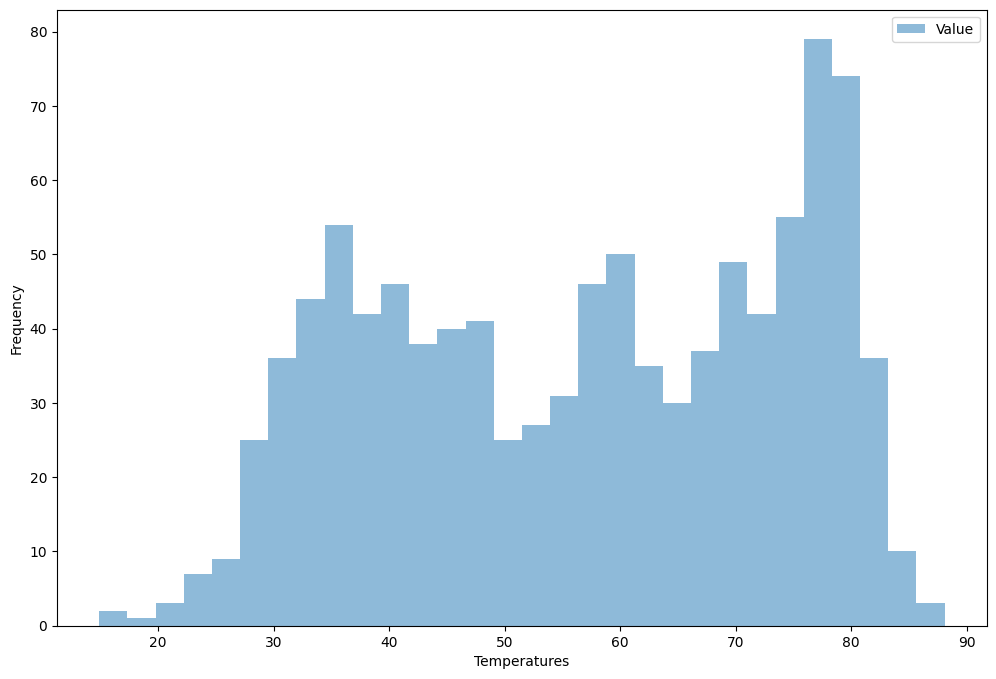

In [284]:
df_temp.plot.hist(bins=30 ,alpha=0.5, figsize=(12, 8))
plt.xlabel("Temperatures")
plt.ylabel("Frequency")
plt.show()

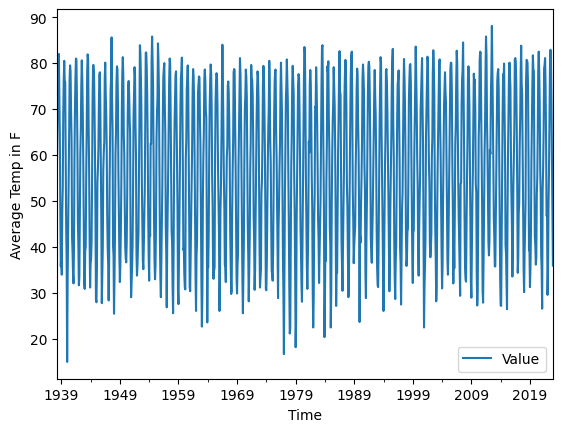

In [285]:
df_temp.plot()
plt.xlabel("Time")
plt.ylabel("Average Temp in F")
plt.show()

<Axes: ylabel='Density'>

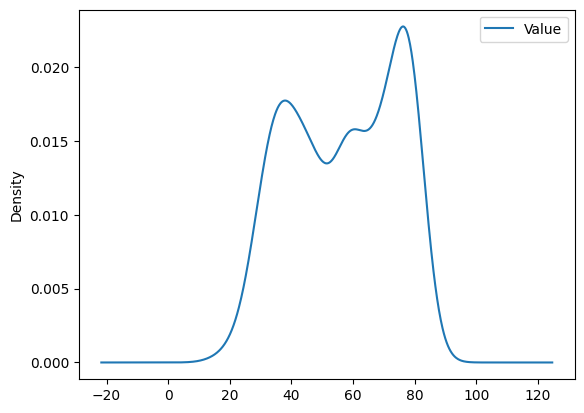

In [286]:
df_temp.plot.kde()

• Generate descriptive statistics

In [287]:
df_temp.describe()

,Value
count,1017.000000
mean,56.851327
std,17.485213
min,14.900000
25%,40.800000
50%,58.500000
75%,73.600000
max,88.100000


Where eagles dare. Create a four-column table shown below the temperature plot at the NOOA website

In [288]:
df_temp.sort_values(by='Value', ascending=True, inplace=True)
df_temp['rank'] = range(1, len(df_temp) + 1)

In [289]:
df_temp.index = pd.to_datetime(df_temp.index, format='%b-%Y')
df_temp['month'] = df_temp.index.month
df_temp['year'] = df_temp.index.year
monthly_mean_temp = df_temp.groupby(['month'])['Value'].mean()
monthly_mean_temp

month
1     31.078571
2     35.477381
3     45.541071
4     56.978824
5     66.791765
6     76.167059
7     80.072941
8     78.362353
9     70.671765
10    59.189412
11    45.779412
12    35.417647
Name: Value, dtype: float64

In [290]:
df_monthly_mean = pd.DataFrame(monthly_mean_temp)
df_monthly_mean.rename(columns={'Value': 'monthly_mean_temperature'}, inplace=True)
df_temp = df_temp.merge(df_monthly_mean, left_on='month', right_index=True)
df_temp

,Value,rank,month,year,monthly_mean_temperature
Date,,,,,
1940-01-01,14.9,1,1,1940,31.078571
1977-01-01,16.6,2,1,1977,31.078571
1979-01-01,18.1,3,1,1979,31.078571
1978-01-01,21.1,5,1,1978,31.078571
1982-01-01,22.4,8,1,1982,31.078571
...,...,...,...,...,...
1966-07-01,84.0,1011,7,1966,80.072941
1955-07-01,84.3,1012,7,1955,80.072941
2011-07-01,85.8,1015,7,2011,80.072941


In [291]:
df_temp.drop(columns = ['month', 'year'], inplace = True)


In [292]:
df_temp.rename(columns = {"Value": "Temperature"}, inplace=True)
df_temp

,Temperature,rank,monthly_mean_temperature
Date,,,
1940-01-01,14.9,1,31.078571
1977-01-01,16.6,2,31.078571
1979-01-01,18.1,3,31.078571
1978-01-01,21.1,5,31.078571
1982-01-01,22.4,8,31.078571
...,...,...,...
1966-07-01,84.0,1011,80.072941
1955-07-01,84.3,1012,80.072941
2011-07-01,85.8,1015,80.072941


In [293]:
df_temp.sort_index(inplace=True)
df_temp.reset_index(inplace=True)
df_temp

,Date,Temperature,rank,monthly_mean_temperature
0,1938-04-01,57.3,494,56.978824
1,1938-05-01,65.6,626,66.791765
2,1938-06-01,74.3,777,76.167059
3,1938-07-01,81.3,985,80.072941
4,1938-08-01,82.0,991,78.362353
...,...,...,...,...
1012,2022-08-01,79.7,940,78.362353
1013,2022-09-01,71.4,725,70.671765
1014,2022-10-01,58.7,513,59.189412
1015,2022-11-01,47.3,363,45.779412
